# Topic Modelling with BERTopic and c-TF-IDF

In [20]:
# %pip install bertopic

## Imports

In [21]:
from bertopic import BERTopic
from hdbscan import HDBSCAN
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from sentence_transformers import SentenceTransformer
import itertools
from umap import UMAP
import pandas as pd
from pathlib import Path
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Load Dataset

In [22]:
path = Path(os.getcwd())
path = path.parent / 'data' / 'processed' / 'reviews.csv' 

df = pd.read_csv(str(path))

df.head()

,Title,Airline,Type of Traveller,Class,Route,Month Flown,Overall Rating,Title.1,Reviews,Cleaned Reviews
0,Flight was amazing,Singapore Airlines,Solo Leisure,Business Class,Jakarta to Singapore,December 2023,9,Flight was amazing,Flight was amazing. The crew onboard this fl...,flight amazing crew onboard flight welcomin...
1,seats on this aircraft are dreadful,Singapore Airlines,Solo Leisure,Economy Class,Phuket to Singapore,February 2024,3,seats on this aircraft are dreadful,Booking an emergency exit seat still meant h...,book emergency exit seat mean huge discomfo...
2,Food was plentiful and tasty,Singapore Airlines,Family Leisure,Economy Class,Siem Reap to Singapore,February 2024,10,Food was plentiful and tasty,Excellent performance on all fronts. I would...,excellent performance front definitely choo...
3,“how much food was available,Singapore Airlines,Solo Leisure,Economy Class,Singapore to London Heathrow,February 2024,10,“how much food was available,Pretty comfortable flight considering I was f...,pretty comfortable flight consider fly econo...
4,“service was consistently good”,Singapore Airlines,Family Leisure,Economy Class,Singapore to Phnom Penh,February 2024,10,“service was consistently good”,The service was consistently good from start ...,service consistently good start finish cabin...


## Run BERTopic

In [23]:
docs = df['Cleaned Reviews'].dropna().tolist()

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=False)
topics, probs = topic_model.fit_transform(docs)

In [24]:
df['topic'] = topics
df.head()

,Title,Airline,Type of Traveller,Class,Route,Month Flown,Overall Rating,Title.1,Reviews,Cleaned Reviews,topic
0,Flight was amazing,Singapore Airlines,Solo Leisure,Business Class,Jakarta to Singapore,December 2023,9,Flight was amazing,Flight was amazing. The crew onboard this fl...,flight amazing crew onboard flight welcomin...,4
1,seats on this aircraft are dreadful,Singapore Airlines,Solo Leisure,Economy Class,Phuket to Singapore,February 2024,3,seats on this aircraft are dreadful,Booking an emergency exit seat still meant h...,book emergency exit seat mean huge discomfo...,-1
2,Food was plentiful and tasty,Singapore Airlines,Family Leisure,Economy Class,Siem Reap to Singapore,February 2024,10,Food was plentiful and tasty,Excellent performance on all fronts. I would...,excellent performance front definitely choo...,4
3,“how much food was available,Singapore Airlines,Solo Leisure,Economy Class,Singapore to London Heathrow,February 2024,10,“how much food was available,Pretty comfortable flight considering I was f...,pretty comfortable flight consider fly econo...,-1
4,“service was consistently good”,Singapore Airlines,Family Leisure,Economy Class,Singapore to Phnom Penh,February 2024,10,“service was consistently good”,The service was consistently good from start ...,service consistently good start finish cabin...,-1


In [25]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3005,-1_flight_airline_seat_service,"[flight, airline, seat, service, not, singapor...",[ \r\n disappointing start family holiday life...
1,0,1337,0_doha_qatar_airway_good,"[doha, qatar, airway, good, airways, flight, s...",[ colombo new york doha return qatar airway ...
2,1,695,1_france_paris_air_cdg,"[france, paris, air, cdg, flight, bag, af, lug...",[ experience horrible cancel flight morning g...
3,2,303,2_ana_tokyo_japan_jal,"[ana, tokyo, japan, jal, narita, haneda, japan...",[ tokyo haneda london flight okay business c...
4,3,235,3_cathay_hong_kong_pacific,"[cathay, hong, kong, pacific, economy, seat, a...",[ jakarta tokyo haneda hong kong second time ...
5,4,158,4_food_good_crew_clean,"[food, good, crew, clean, comfortable, excelle...",[ excellent flight staff outstanding flight ...
6,5,153,5_emirate_dubai_good_a380,"[emirate, dubai, good, a380, great, food, ente...",[ good flight emirate fly dusseldorf mauriti...
7,6,137,6_istanbul_turkish_crew_excellent,"[istanbul, turkish, crew, excellent, good, cab...",[ istanbul kuala lumpur singapore excellent ...
8,7,133,7_emirate_dubai_flight_not,"[emirate, dubai, flight, not, ask, hour, servi...",[ not describe upset stick fl dubai plane 5 ...
9,8,131,8_korean_seoul_incheon_air,"[korean, seoul, incheon, air, flight, food, go...",[ chicago bangkok seoul korean air portion f...


### Coherence Score

In [26]:
tokenized_docs = [doc.split() for doc in docs]
dictionary = Dictionary(tokenized_docs)

topics = topic_model.get_topics()
topic_words = [[word for word, _ in words] for topic_id, words in topics.items() if topic_id != -1]

coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)

coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Coherence Score: 0.5003


In [27]:
# df['review_length'] = df['Cleaned Reviews'].str.split().apply(len)
# df[df['topic'] == -1]['review_length'].describe()

## Tuning

In [28]:
# def compute_gensim_coherence(topic_model, tokenized_docs, top_n_words=10, coherence='c_v'):
#     dictionary = Dictionary(tokenized_docs)

#     topics = topic_model.get_topics()
#     topic_words = [
#         [word for word, _ in words[:top_n_words]]
#         for topic_id, words in topics.items() if topic_id != -1 and words
#     ]

#     coherence_model = CoherenceModel(
#         topics=topic_words,
#         texts=tokenized_docs,
#         dictionary=dictionary,
#         coherence=coherence,
#         topn=top_n_words
#     )

#     return coherence_model.get_coherence()

# def tune_bertopic(docs,
#                   embedding_model_name="all-MiniLM-L6-v2",
#                   neighbor_vals=[10, 15],
#                   component_vals=[5],
#                   min_cluster_vals=[15, 25],
#                   nr_topics=None,
#                   coherence='c_v',
#                   verbose=False):
    
#     results = []
#     best_model = None
#     best_score = -1

#     embedding_model = SentenceTransformer(embedding_model_name)
#     tokenized_docs = [doc.split() for doc in docs]

#     for n_neighbors, n_components, min_cluster_size in itertools.product(
#         neighbor_vals, component_vals, min_cluster_vals):

#         if verbose:
#             print(f"\n▶️ Trying n_neighbors={n_neighbors}, n_components={n_components}, min_cluster_size={min_cluster_size}")

#         umap_model = UMAP(n_neighbors=n_neighbors,
#                           n_components=n_components,
#                           min_dist=0.0,
#                           metric='cosine')

#         hdbscan_model = HDBSCAN(min_cluster_size=min_cluster_size,
#                                 metric='euclidean',
#                                 cluster_selection_method='eom')

#         topic_model = BERTopic(embedding_model=embedding_model,
#                                umap_model=umap_model,
#                                hdbscan_model=hdbscan_model,
#                                verbose=False)

#         topics, _ = topic_model.fit_transform(docs)

#         if nr_topics:
#             topic_model.reduce_topics(docs, nr_topics=nr_topics)
#             topics = topic_model.topics_

#         score = compute_gensim_coherence(topic_model, tokenized_docs, coherence=coherence)

#         if verbose:
#             print(f"✅ Gensim Coherence ({coherence}): {score:.4f}")

#         results.append({
#             "n_neighbors": n_neighbors,
#             "n_components": n_components,
#             "min_cluster_size": min_cluster_size,
#             "coherence": score
#         })

#         if score > best_score:
#             best_score = score
#             best_model = topic_model

#     result_df = pd.DataFrame(results).sort_values(by="coherence", ascending=False)
#     return best_model, result_df


In [29]:
# best_model, result_df = tune_bertopic(
#     docs=df['Cleaned Reviews'].tolist(),
#     neighbor_vals=[10, 15],
#     component_vals=[5],
#     min_cluster_vals=[15, 25],
#     coherence='c_v',
#     nr_topics=12,
#     verbose=True
# )

# best_model.get_topic_info()

### Didn't really help. Should try grouping the dataset by airline, then perform Topic Modelling

In [30]:
from gensim.utils import simple_preprocess

def compute_gensim_coherence(tokenized_docs, topic_model, top_n_words=10, coherence='c_v'):
    from gensim.corpora import Dictionary
    from gensim.models import CoherenceModel

    dictionary = Dictionary(tokenized_docs)

    topic_words_dict = topic_model.get_topics()
    topics = [
        [word for word, _ in topic_words_dict[topic_id][:top_n_words]]
        for topic_id in topic_words_dict
        if topic_id != -1 and isinstance(topic_words_dict[topic_id], list)
    ]

    coherence_model = CoherenceModel(
        topics=topics,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence=coherence
    )
    return coherence_model.get_coherence()


airline_topic_models = {}

for airline, group in df.groupby("Airline"):
        print(f"\n✈️ Airline: {airline} | Reviews: {len(group)}")

        docs = group["Cleaned Reviews"].dropna().tolist()


        embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
        
        topic_model = BERTopic(embedding_model=embedding_model, verbose=False)
        topics, _ = topic_model.fit_transform(docs)

        # Store the model
        airline_topic_models[airline] = {
                "model": topic_model,
                "topics": topics,
                "docs": docs
        }

        tokenized_docs = [simple_preprocess(doc) for doc in docs]

        topic_words = topic_model.get_topics()
        coherence = compute_gensim_coherence(tokenized_docs, topic_model)
        airline_topic_models[airline]["coherence"] = coherence
        print(f"  📊 Coherence: {coherence:.4f}")

        print(f"  ✅ Topics found: {len(set(topics)) - (1 if -1 in topics else 0)}")            


✈️ Airline: Air France | Reviews: 798


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.5076
  ✅ Topics found: 10

✈️ Airline: All Nippon Airways | Reviews: 258


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.4359
  ✅ Topics found: 5

✈️ Airline: Cathay Pacific Airways | Reviews: 744


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.4734
  ✅ Topics found: 2

✈️ Airline: EVA Air | Reviews: 281


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.5230
  ✅ Topics found: 7

✈️ Airline: Emirates | Reviews: 1350


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.4153
  ✅ Topics found: 2

✈️ Airline: Japan Airlines | Reviews: 201


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.4095
  ✅ Topics found: 2

✈️ Airline: Korean Air | Reviews: 187


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.4037
  ✅ Topics found: 4

✈️ Airline: Qatar Airways | Reviews: 1624


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.4499
  ✅ Topics found: 22

✈️ Airline: Singapore Airlines | Reviews: 972


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.4622
  ✅ Topics found: 2

✈️ Airline: Turkish Airlines | Reviews: 1685


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  📊 Coherence: 0.5131
  ✅ Topics found: 22


In [31]:
airline_topic_models

{'Air France': {'model': <bertopic._bertopic.BERTopic at 0x719f92139f30>,
  'topics': [-1,
   -1,
   -1,
   -1,
   3,
   -1,
   -1,
   3,
   -1,
   0,
   -1,
   -1,
   0,
   -1,
   -1,
   9,
   2,
   3,
   0,
   -1,
   -1,
   2,
   0,
   9,
   -1,
   1,
   0,
   -1,
   2,
   -1,
   -1,
   -1,
   -1,
   0,
   -1,
   -1,
   5,
   -1,
   -1,
   5,
   -1,
   -1,
   3,
   4,
   0,
   -1,
   -1,
   2,
   -1,
   3,
   0,
   -1,
   -1,
   -1,
   0,
   0,
   -1,
   0,
   -1,
   -1,
   -1,
   3,
   -1,
   8,
   2,
   9,
   0,
   -1,
   -1,
   -1,
   5,
   -1,
   5,
   -1,
   -1,
   -1,
   0,
   9,
   -1,
   2,
   -1,
   0,
   -1,
   -1,
   2,
   5,
   -1,
   -1,
   -1,
   -1,
   0,
   2,
   0,
   0,
   2,
   8,
   -1,
   -1,
   -1,
   8,
   1,
   -1,
   -1,
   -1,
   -1,
   -1,
   8,
   -1,
   -1,
   8,
   2,
   -1,
   0,
   4,
   -1,
   8,
   -1,
   -1,
   -1,
   -1,
   8,
   -1,
   1,
   5,
   -1,
   0,
   0,
   4,
   -1,
   -1,
   8,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   

In [32]:
for airline in airline_topic_models:
    topic_info = airline_topic_models[airline]["model"].get_topic_info()
    print(f"\n✈️ {airline} Topic Info:\n", topic_info.head())


✈️ Air France Topic Info:
    Topic  Count                          Name  \
0     -1    373     -1_flight_seat_air_france   
1      0    101  0_bag_luggage_baggage_france   
2      1     67     1_france_air_flight_paris   
3      2     63    2_flight_cancel_ticket_air   
4      3     38     3_delay_flight_paris_hour   

                                      Representation  \
0  [flight, seat, air, france, paris, service, ti...   
1  [bag, luggage, baggage, france, day, air, clai...   
2  [france, air, flight, paris, fly, good, friend...   
3  [flight, cancel, ticket, air, refund, france, ...   
4  [delay, flight, paris, hour, air, france, conn...   

                                 Representative_Docs  
0  [  tel aviv stockholm paris cdg arrive airport...  
1  [   family 4 trip hamburg early july stop pari...  
2  [  fly london paris air france air france app ...  
3  [   bad experience company book flight cancel ...  
4  [   use air france option schedule leave italy...  

✈️ All Ni

In [33]:
for airline in airline_topic_models:
    print(f"\n✈️ {airline} | Coherence: {airline_topic_models[airline]['coherence']:.4f}")
    
    topic_info = airline_topic_models[airline]["model"].get_topic_info()
    topic_info = topic_info[topic_info.Topic != -1]  # Ignore outlier topic

    for _, row in topic_info.iterrows():
        print(f"  🔹 Topic {row['Topic']:>2}: {row['Name']} (Count: {row['Count']})")



✈️ Air France | Coherence: 0.5076
  🔹 Topic  0: 0_bag_luggage_baggage_france (Count: 101)
  🔹 Topic  1: 1_france_air_flight_paris (Count: 67)
  🔹 Topic  2: 2_flight_cancel_ticket_air (Count: 63)
  🔹 Topic  3: 3_delay_flight_paris_hour (Count: 38)
  🔹 Topic  4: 4_cdg_dublin_flight_paris (Count: 38)
  🔹 Topic  5: 5_seat_flight_service_class (Count: 36)
  🔹 Topic  6: 6_seat_jfk_a380_cdg (Count: 33)
  🔹 Topic  7: 7_food_flight_meal_bad (Count: 18)
  🔹 Topic  8: 8_good_crew_seat_food (Count: 16)
  🔹 Topic  9: 9_que_flight_air_france (Count: 15)

✈️ All Nippon Airways | Coherence: 0.4359
  🔹 Topic  0: 0_flight_good_food_tokyo (Count: 52)
  🔹 Topic  1: 1_flight_ana_time_airport (Count: 39)
  🔹 Topic  2: 2_seat_ana_class_service (Count: 30)
  🔹 Topic  3: 3_flight_ana_food_seat (Count: 22)
  🔹 Topic  4: 4_bangkok_flight_service_good (Count: 12)

✈️ Cathay Pacific Airways | Coherence: 0.4734
  🔹 Topic  0: 0_flight_cathay_seat_kong (Count: 657)
  🔹 Topic  1: 1_bangkok_flight_hong_kong (Count: 58

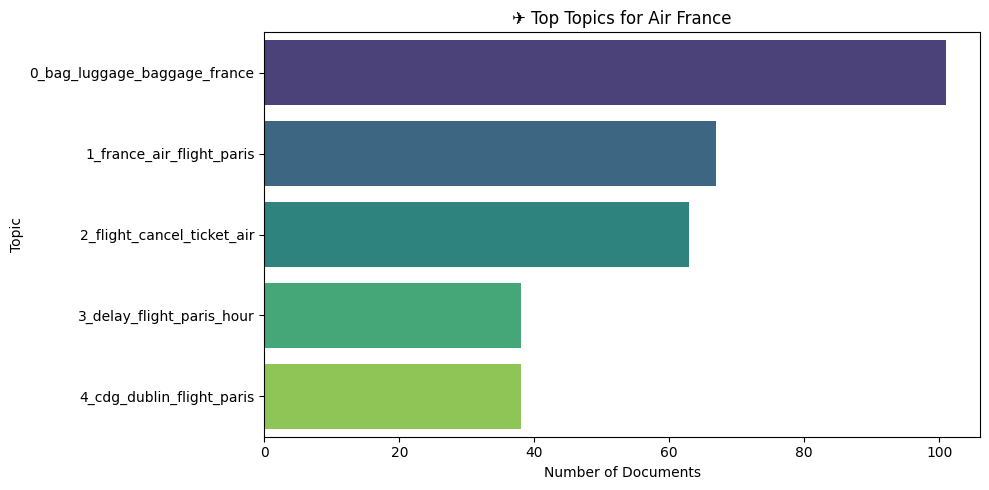

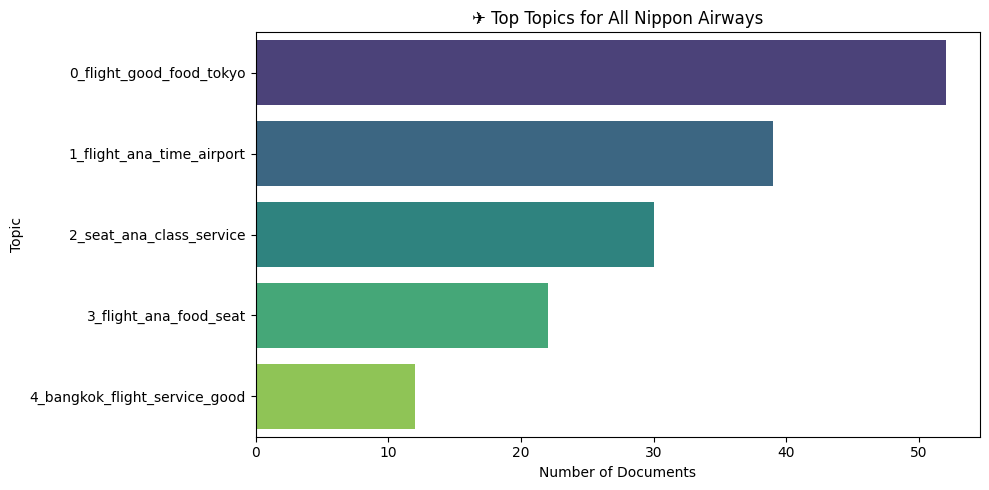

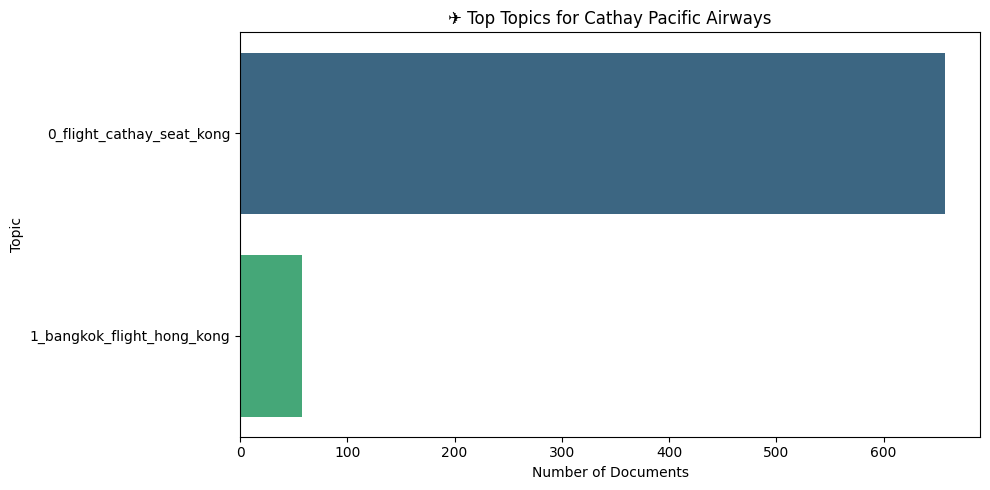

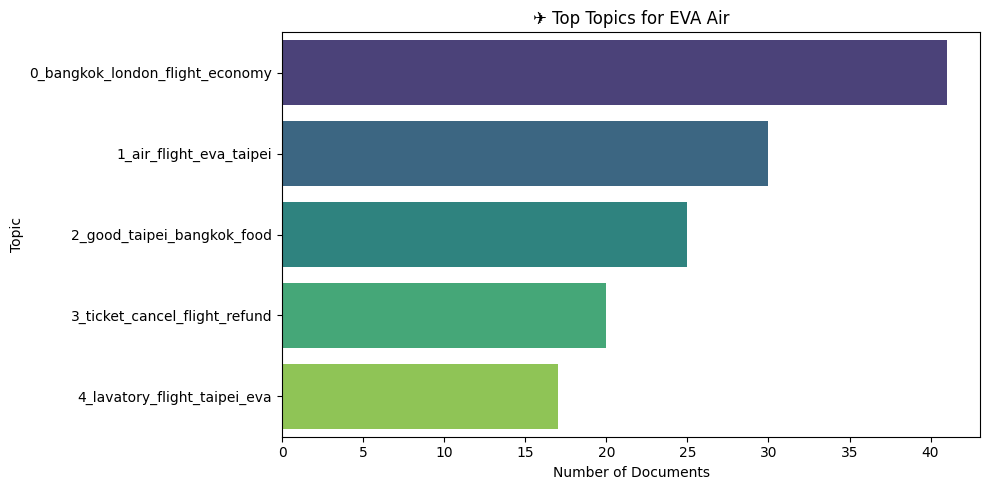

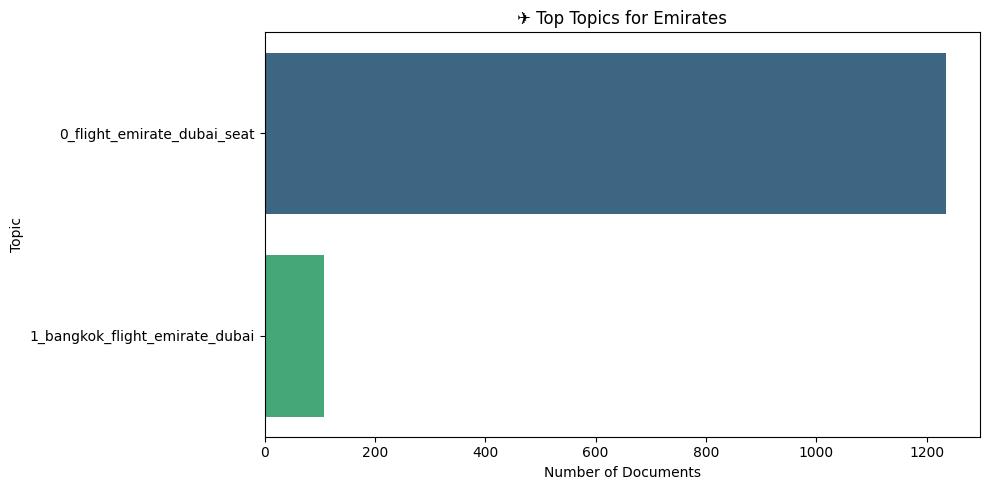

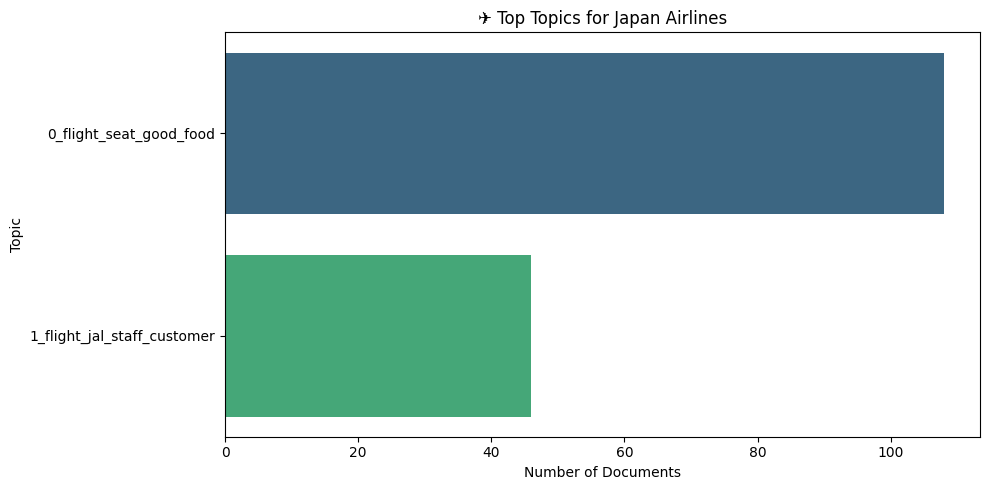

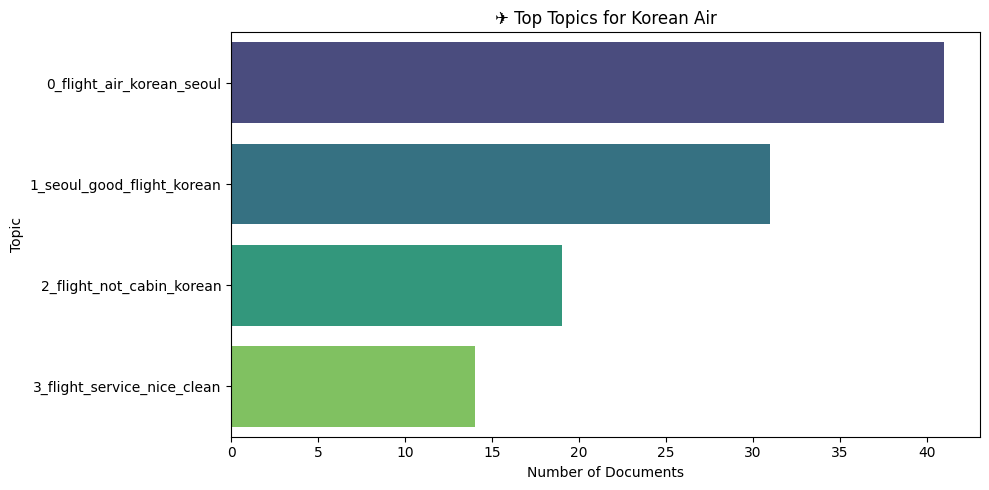

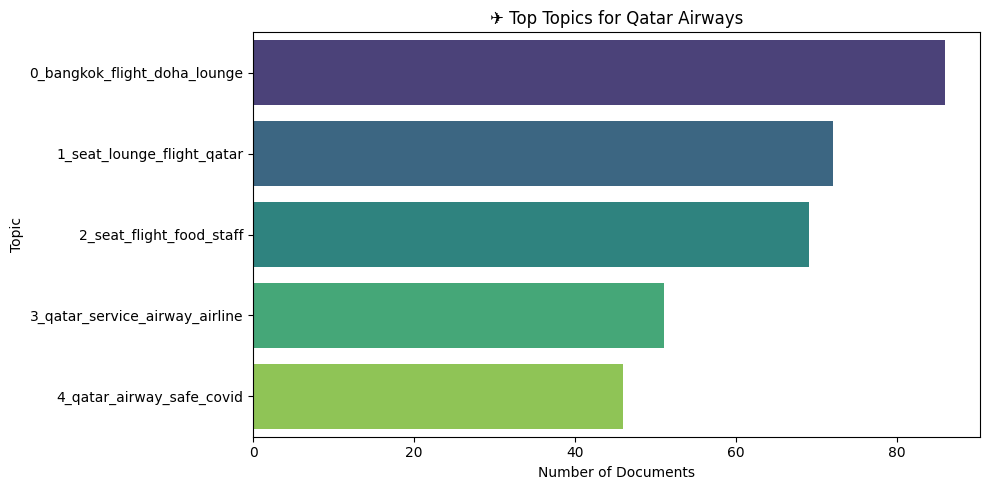

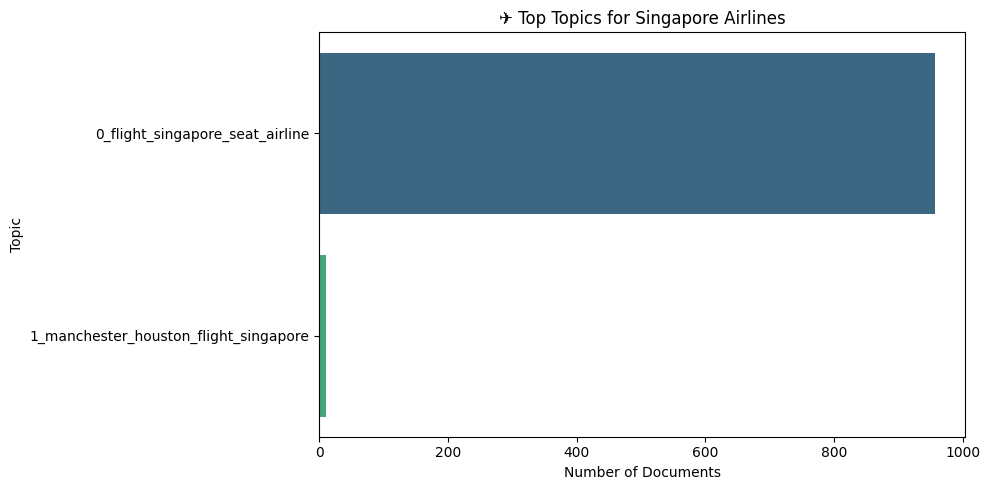

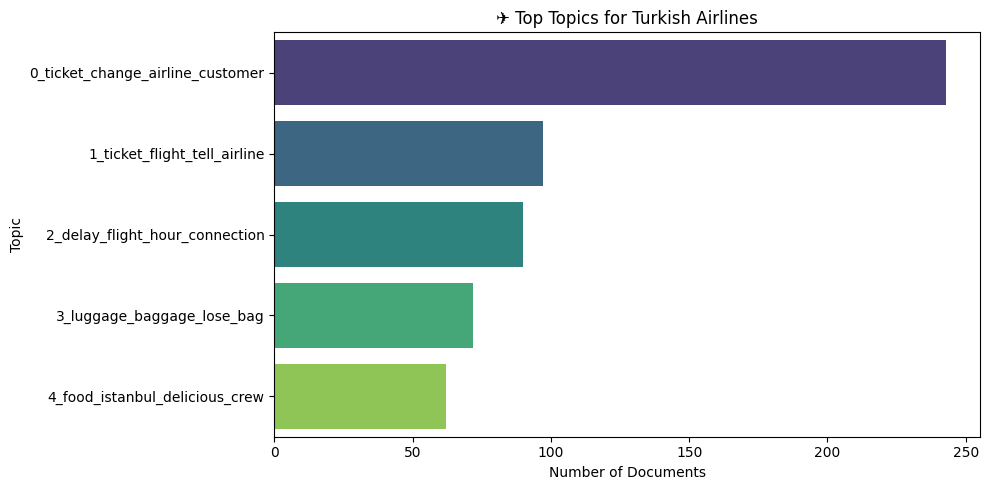

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

for airline in airline_topic_models:
    topic_info = airline_topic_models[airline]["model"].get_topic_info()
    topic_info = topic_info[topic_info.Topic != -1].sort_values(by="Count", ascending=False).head(5)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(data=topic_info, x="Count", y="Name", palette="viridis")
    plt.title(f"✈️ Top Topics for {airline}")
    plt.xlabel("Number of Documents")
    plt.ylabel("Topic")
    plt.tight_layout()
    plt.show()
